In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [3]:
voice = pd.read_csv('./voice_ver2.csv')
voice

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,0.109148,0.091542,0.071577,0.024263,0.195321,0.171057,1.899222,6.472859,0.948618,0.678843,...,0.109148,0.190846,0.030189,0.275862,0.359375,0.007812,0.718750,0.710938,0.354396,female
156,0.158417,0.081200,0.187643,0.085523,0.219079,0.133556,1.817030,7.238168,0.955927,0.698466,...,0.158417,0.192754,0.062500,0.262295,0.359063,0.031250,0.921875,0.890625,0.315027,female
157,0.116002,0.088799,0.121542,0.023682,0.193980,0.170299,2.193672,8.404158,0.943584,0.676598,...,0.116002,0.184000,0.086486,0.258065,0.338170,0.007812,0.710938,0.703125,0.403419,female
158,0.097733,0.080078,0.065308,0.032779,0.159893,0.127113,1.272920,3.865641,0.957693,0.715485,...,0.097733,0.178400,0.021680,0.253968,0.525608,0.007812,4.257812,4.250000,0.178741,female


In [4]:
voice.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,0.161935,0.070997,0.161434,0.115098,0.219965,0.104866,2.865968,28.879883,0.928948,0.564458,0.119626,0.161935,0.141252,0.025248,0.253990,0.505623,0.028662,3.020508,2.991846,0.207933
std,0.029566,0.011849,0.042431,0.050383,0.026302,0.040586,3.236689,98.895625,0.030130,0.145481,0.075861,0.029566,0.037592,0.020132,0.028888,0.366337,0.041039,2.279610,2.276682,0.101545
min,0.059781,0.036543,0.032027,0.008701,0.090193,0.035785,0.141735,2.068455,0.846389,0.169242,0.000000,0.059781,0.055565,0.015640,0.117647,0.007812,0.007812,0.007812,0.000000,0.000000
25%,0.143414,0.064473,0.137353,0.082039,0.209451,0.064589,1.600196,5.672939,0.907541,0.449460,0.050132,0.143414,0.106285,0.016125,0.250000,0.242415,0.007812,0.730469,0.703125,0.124868
50%,0.166923,0.071983,0.162532,0.117773,0.224505,0.113332,2.078021,8.392857,0.933053,0.568473,0.121219,0.166923,0.142279,0.017260,0.262295,0.393424,0.007812,2.820312,2.812500,0.204122
75%,0.185609,0.079885,0.198937,0.158224,0.237257,0.126197,2.988381,15.759551,0.953392,0.690522,0.193531,0.185609,0.175433,0.024778,0.275862,0.707960,0.031250,4.980469,4.972656,0.278276
max,0.209933,0.091723,0.232552,0.197406,0.256527,0.186555,30.757155,1024.927705,0.978482,0.842936,0.268978,0.209933,0.214127,0.168421,0.275862,2.253551,0.218750,7.000000,6.992188,0.505974


In [26]:
voice.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [27]:
voice_label = pd.Categorical(voice['label']).codes
voice_label = voice_label.reshape([-1,1])
voice_label

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
    

In [28]:
voice_feature = voice.iloc[:, :-1].values

In [29]:
def gaussianD(data) :
    mean_feature = data.mean(axis=0)
    pre_feature = data - mean_feature
    std_feature = data.std(axis=0)
    return pre_feature/std_feature

In [30]:
pre_voice_feature = gaussianD(voice_feature)

In [31]:
x_train, x_test, y_train, y_test = train_test_split(pre_voice_feature, voice_label, test_size=0.2, random_state=1)

print("Number of train data: {}".format(y_train.shape[0]))
print("Number of test data: {}".format(y_test.shape[0]))

Number of train data: 128
Number of test data: 32


# 1. Perceptron

In [32]:
from sklearn.linear_model import Perceptron

In [52]:
Per = Perceptron() 

# Perceptron fitting
Per.fit(x_train, y_train)

/home/pirl/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Perceptron()

In [56]:
# Test Accuracy predict
y_pred_per = Per.predict(x_test)
Per_acc = np.round(metrics.accuracy_score(y_test, y_pred_per)*100,1)

print('Perceptron accuracy :', Per_acc,'%')

Perceptron accuracy : 81.2 %


In [57]:
def draw_confusion(confusion_array) :
    conf_matrix = pd.DataFrame(confusion_array, columns=['Predicted:0(Female)','Predicted:1(Male)'],index=['Actual:0(Female)','Actual:1(Male)'])
    plt.figure(figsize = (8,6))
    #heatmap
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu')

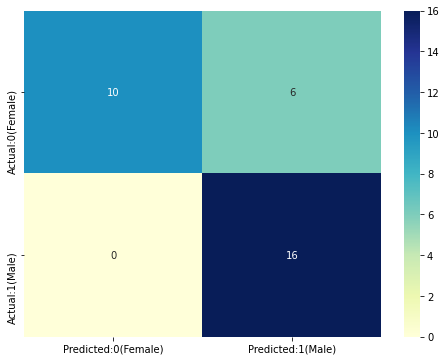

In [58]:
Per_confusion = confusion_matrix(y_test, y_pred_per)
draw_confusion(Per_confusion)

# 2. SVM

In [59]:
from sklearn.svm import SVC

In [60]:
svc = SVC()
#SVM fitting
svc.fit(x_train, y_train)

# Test Accuracy predict
y_pred_svm = svc.predict(x_test)
svm_acc = np.round(metrics.accuracy_score(y_test,y_pred_svm)*100,0)

print('SVM accuracy :', svm_acc,'%')

SVM accuracy : 91.0 %


/home/pirl/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


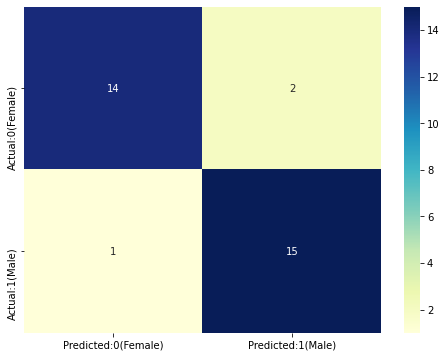

In [61]:
svm_confusion = confusion_matrix(y_test, y_pred_svm)
draw_confusion(svm_confusion)

# 3. Logistic Regression 

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
logR = LogisticRegression()

#logistic regression fitting
logR.fit(x_train, y_train)

# Test Accuracy predict
y_pred_logi = logR.predict(x_test)
logR_acc = np.round(metrics.accuracy_score(y_test,y_pred_logi)*100,0)
print('Logistic Regression accuracy :', logR_acc,'%')

Logistic Regression accuracy : 91.0 %


/home/pirl/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


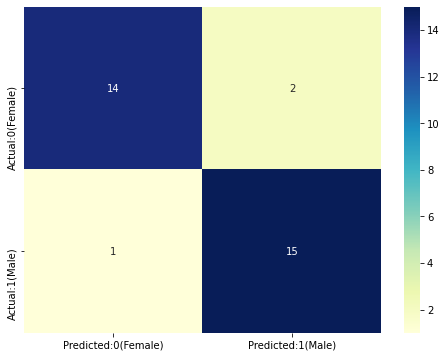

In [64]:
logR_confusion = confusion_matrix(y_test, y_pred_logi)
draw_confusion(logR_confusion)